<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import numpy as np
import pandas as pd, patsy
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import metrics


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Briefly looking at all the Yelp datasets

In [2]:
businesses = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/sf/yelp/businesses.csv')

In [6]:
businesses.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,10,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,+14154217044
1,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262


In [7]:
code_legend = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/sf/yelp/code_legend.csv')

In [8]:
code_legend

,Minimum_Score,Maximum_Score,Description
0,0,70,Poor
1,71,85,Needs Improvement
2,86,90,Adequate
3,91,100,Good


In [9]:
inspections = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/sf/yelp/inspections.csv')

In [10]:
inspections.head(2)

,business_id,score,date,type
0,10,94,20140729,routine
1,10,92,20140114,routine


In [11]:
neighborhoods = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/sf/yelp/neighborhood_legend.csv')

In [12]:
neighborhoods.head(2)

,Neighborhood,City,Population,Polygon
0,Alamo Square,San Francisco,"5,617",<Polygon><outerBoundaryIs><LinearRing><tessell...
1,Bayview,San Francisco,"35,890",<Polygon><outerBoundaryIs><LinearRing><tessell...


In [13]:
violations = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/sf/yelp/violations.csv')

In [14]:
violations.head(2)

,business_id,date,description
0,10,20140729,Insufficient hot water or running water [ dat...
1,10,20140729,Unapproved or unmaintained equipment or utensi...


### Dataset I'll be using

In [15]:
violations_parsed = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/sf/yelp/violations_parsed_words.csv')

/Users/VanessaG/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
violations_parsed.head(2)

,business_id,score,date,type,violation_count,days_since_first_violation,name,address,city,state,...,washed fruits,wastewater,wastewater contamination,wastewater disposal,water,water running,wiping,wiping cloths,worker,worker safety
0,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
1,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0


In [51]:
violations_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32455 entries, 0 to 32454
Columns: 393 entries, business_id to worker safety
dtypes: float64(8), int64(373), object(12)
memory usage: 97.3+ MB


In [20]:
#just want to see all the column names
list(violations_parsed.columns)

['business_id',
 'score',
 'date',
 'type',
 'violation_count',
 'days_since_first_violation',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'phone_number',
 'polygon',
 'neighborhood',
 'population',
 'score_code',
 'business_count',
 'description',
 '200',
 '200 feet',
 'adulterated',
 'adulterated food',
 'advisory',
 'advisory provided',
 'animal',
 'approved',
 'approved commissary',
 'area',
 'area garbage',
 'available',
 'building',
 'building permit',
 'card',
 'card available',
 'ceilings',
 'certificate',
 'certificate food',
 'certified',
 'certified food',
 'charge',
 'charge food',
 'clean',
 'clean properly',
 'cleaned',
 'cleaned sanitized',
 'cloths',
 'cloths clean',
 'commissary',
 'communicable',
 'communicable disease',
 'condition',
 'conditions',
 'constructed',
 'constructed toilet',
 'consumer',
 'consumer advisory',
 'contact',
 'contact surfaces',
 'containers',
 'containers area',
 'contaminated',
 'contaminated adultera

In [30]:
#non-binary variables
violations_parsed.columns[0:20]

Index([u'business_id', u'score', u'date', u'type', u'violation_count',
       u'days_since_first_violation', u'name', u'address', u'city', u'state',
       u'postal_code', u'latitude', u'longitude', u'phone_number', u'polygon',
       u'neighborhood', u'population', u'score_code', u'business_count',
       u'description'],
      dtype='object')

### Below I'm figuring out what columns are useful

In [21]:
#columns with only one value - not useful
for c in violations_parsed.columns:
    unique = len(violations_parsed[c].unique())
    if unique == 1:
        print c, unique

city 1
state 1


In [56]:
#columns with 2 unique values but not necessarily boolean - for example type
for c in violations_parsed.columns:
    unique = len(violations_parsed[c].unique())
    if unique == 2:
        print c, unique

type 2
200 2
200 feet 2
adulterated 2
adulterated food 2
advisory 2
advisory provided 2
animal 2
approved 2
approved commissary 2
area 2
area garbage 2
available 2
building 2
building permit 2
card 2
card available 2
ceilings 2
certificate 2
certificate food 2
certified 2
certified food 2
charge 2
charge food 2
clean 2
clean properly 2
cleaned 2
cleaned sanitized 2
cloths 2
cloths clean 2
commissary 2
communicable 2
communicable disease 2
condition 2
conditions 2
constructed 2
constructed toilet 2
consumer 2
consumer advisory 2
contact 2
contact surfaces 2
containers 2
containers area 2
contaminated 2
contaminated adulterated 2
contamination 2
control 2
control measure 2
cooking 2
cooking time 2
cooling 2
cooling methods 2
cottage 2
cottage food 2
defective 2
defective plumbing 2
degraded 2
degraded floors 2
discharge 2
discharge employee 2
disease 2
display 2
disposal 2
dressing 2
dressing rooms 2
eating 2
eating smoking 2
employee 2
employee communicable 2
employee eating 2
employee 

In [57]:
#columns with more than 2 unique values
for c in violations_parsed.columns:
    unique = len(violations_parsed[c].unique())
    if unique > 2:
        print c, unique

business_id 3705
score 49
date 779
violation_count 8
days_since_first_violation 980
name 3427
address 3516
postal_code 53
latitude 2918
longitude 2971
phone_number 3175
polygon 44
neighborhood 44
population 42
score_code 4
business_count 40
description 130


In [58]:
#gives me a mask for the "actual" binary variables 
binary_cols = [col for col in violations_parsed
             if violations_parsed[[col]].isin([0, 1]).all().values]


In [59]:
violations_parsed[binary_cols].shape

(32455, 373)

In [60]:
violations_parsed[binary_cols].isnull().values.any()

False

In [53]:
#so only 20 columns are currently non-binary
violations_parsed.shape

(32455, 393)

In [61]:
#this will give me the non-binary columns
not_binary_cols = [x for x in violations_parsed.columns if x not in binary_cols]

In [62]:
not_binary_cols

['business_id',
 'score',
 'date',
 'type',
 'violation_count',
 'days_since_first_violation',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'phone_number',
 'polygon',
 'neighborhood',
 'population',
 'score_code',
 'business_count',
 'description']

In [63]:
violations_parsed[not_binary_cols].head(2)

,business_id,score,date,type,violation_count,days_since_first_violation,name,address,city,state,postal_code,latitude,longitude,phone_number,polygon,neighborhood,population,score_code,business_count,description
0,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Inadequate and inaccessible handwashing facili...
1,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,94104,37.791116,-122.403816,1.41542e+10,10.0,Downtown,"13,000",good,112.0,Unclean or degraded floors walls or ceilings


In [44]:
#looking for missing values in the non-binary columns
violations_parsed[not_binary_cols].isnull().sum()

business_id                      0
score                            0
date                             0
type                             0
violation_count                  0
days_since_first_violation       0
name                             0
address                          0
city                             0
state                            0
postal_code                    480
latitude                         0
longitude                        0
phone_number                  2162
polygon                          0
neighborhood                     0
population                       0
score_code                       0
business_count                   0
description                   2176
dtype: int64

In [64]:
violations_parsed[not_binary_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32455 entries, 0 to 32454
Data columns (total 20 columns):
business_id                   32455 non-null float64
score                         32455 non-null float64
date                          32455 non-null datetime64[ns]
type                          32455 non-null object
violation_count               32455 non-null float64
days_since_first_violation    32455 non-null float64
name                          32455 non-null object
address                       32455 non-null object
city                          32455 non-null object
state                         32455 non-null object
postal_code                   31975 non-null object
latitude                      32455 non-null float64
longitude                     32455 non-null float64
phone_number                  30293 non-null object
polygon                       32455 non-null float64
neighborhood                  32455 non-null object
population                    32455 non-null

In [65]:
#convert date to datetime
violations_parsed['date'] = pd.to_datetime(violations_parsed['date'], format='%Y/%m/%d')

In [66]:
violations_parsed.date.dtypes

dtype('<M8[ns]')

In [64]:
interesting_vars = violations_parsed[['score', 'date', \
                                           'violation_count', 'days_since_first_violation', 'neighborhood',\
                                           'population', 'business_count']]

In [66]:
interesting_vars.dtypes

score                                float64
date                          datetime64[ns]
violation_count                      float64
days_since_first_violation           float64
neighborhood                          object
population                            object
business_count                       float64
dtype: object

In [67]:
interesting_vars[['population']] = interesting_vars[['population']].apply(pd.to_numeric, errors='coerce')

In [68]:
interesting_vars.dtypes

score                                float64
date                          datetime64[ns]
violation_count                      float64
days_since_first_violation           float64
neighborhood                          object
population                           float64
business_count                       float64
dtype: object

In [69]:
interesting_vars.shape

(32455, 7)

In [70]:
interesting_vars.head()

,score,date,violation_count,days_since_first_violation,neighborhood,population,business_count
0,92.0,2014-01-14,1.0,0.0,Downtown,NaN,112.0
1,92.0,2014-01-14,1.0,0.0,Downtown,NaN,112.0
2,92.0,2014-01-14,1.0,0.0,Downtown,NaN,112.0
3,94.0,2014-07-29,2.0,196.0,Downtown,NaN,112.0
4,94.0,2014-07-29,2.0,196.0,Downtown,NaN,112.0


In [110]:
interesting_vars.describe()

,score,violation_count,days_since_first_violation,population,business_count
count,32455.000000,32455.000000,32455.000000,1814.000000,32455.000000
mean,86.101186,2.239439,321.846372,1315.541345,130.471607
std,9.386847,1.167865,307.113839,1434.475897,108.646587
min,46.000000,1.000000,0.000000,460.000000,2.000000
25%,81.000000,1.000000,0.000000,460.000000,44.000000
50%,88.000000,2.000000,248.000000,460.000000,100.000000
75%,93.000000,3.000000,548.000000,1000.000000,186.000000
max,100.000000,8.000000,1082.000000,4000.000000,379.000000


In [116]:
from scipy.stats import spearmanr

spearmanr(interesting_vars.score.values, interesting_vars.violation_count.values)

SpearmanrResult(correlation=0.045766295461716899, pvalue=1.5982323483942548e-16)

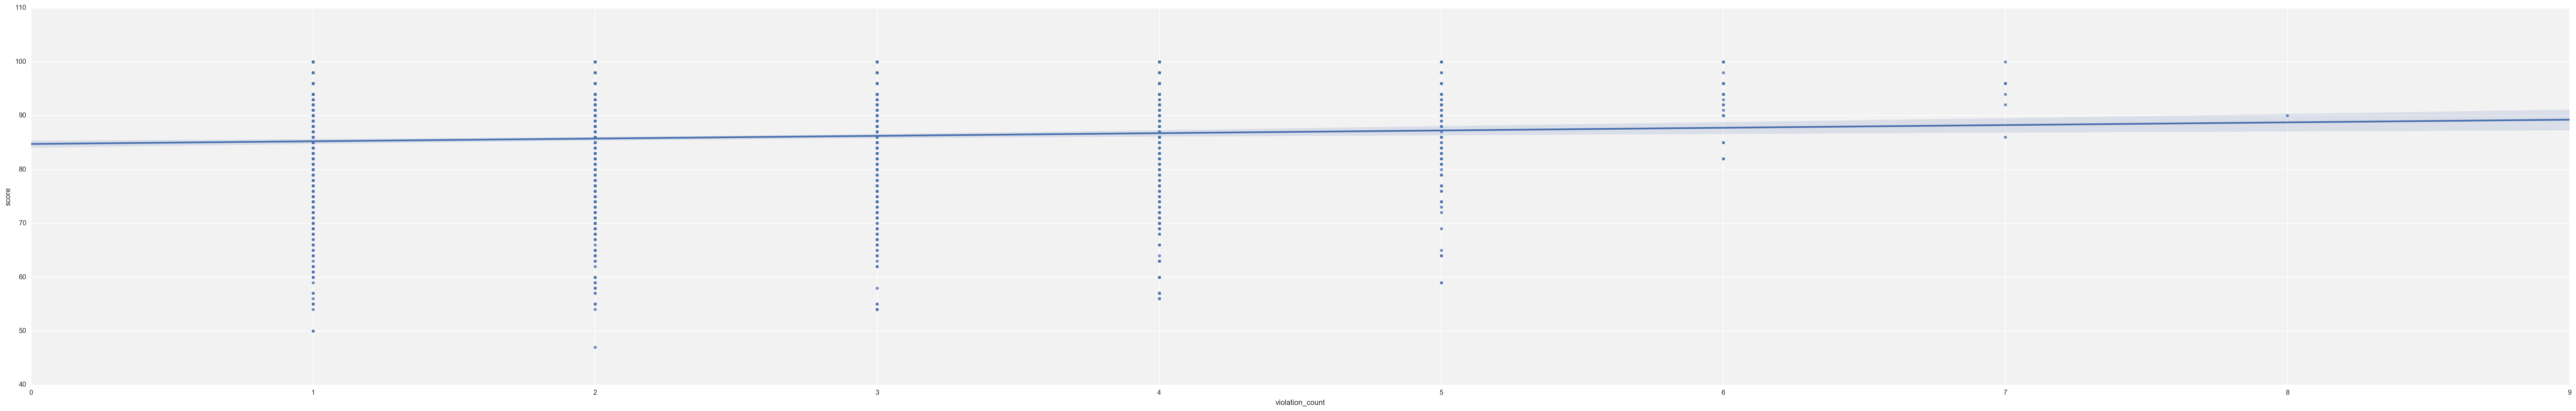

In [115]:
sns.regplot(x='violation_count', y='score', data=iv_frac)

In [102]:
violations_parsed.columns[0:20]

wanted_columns = list([c for c in violations_parsed.columns[0:20] if c in interesting_vars.columns])+list(violations_parsed.columns[20:])

In [104]:
X_interesting = violations_parsed[wanted_columns].values
X_interesting.shape

(32455, 380)

### some eda I guess...

In [71]:
interesting_vars.corr()

,score,violation_count,days_since_first_violation,population,business_count
score,1.000000,0.057639,-0.006737,-0.014436,0.000090
violation_count,0.057639,1.000000,0.902845,0.096457,-0.000037
days_since_first_violation,-0.006737,0.902845,1.000000,0.042894,0.007562
population,-0.014436,0.096457,0.042894,1.000000,-0.883655
business_count,0.000090,-0.000037,0.007562,-0.883655,1.000000


In [72]:
interesting_vars.describe()

,score,violation_count,days_since_first_violation,population,business_count
count,32455.000000,32455.000000,32455.000000,1814.000000,32455.000000
mean,86.101186,2.239439,321.846372,1315.541345,130.471607
std,9.386847,1.167865,307.113839,1434.475897,108.646587
min,46.000000,1.000000,0.000000,460.000000,2.000000
25%,81.000000,1.000000,0.000000,460.000000,44.000000
50%,88.000000,2.000000,248.000000,460.000000,100.000000
75%,93.000000,3.000000,548.000000,1000.000000,186.000000
max,100.000000,8.000000,1082.000000,4000.000000,379.000000


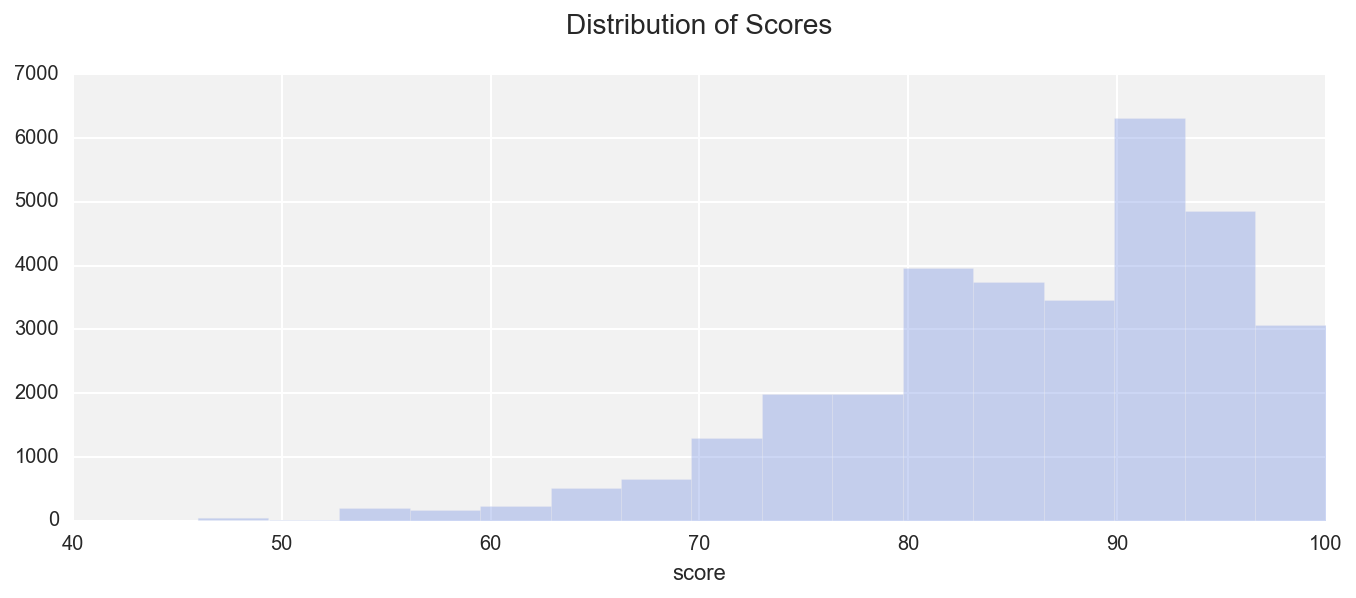

In [73]:
sns.set(rc={"figure.figsize": (10, 4)})
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
rate_dist = sns.distplot(interesting_vars['score'],kde=False, bins=16, color="#819ae4")
rate_dist.set_title('Distribution of Scores' '\n', fontsize=14)

In [74]:
for_plot = interesting_vars[['neighborhood', 'score']].sort_values(['score'], ascending=False, axis=0)

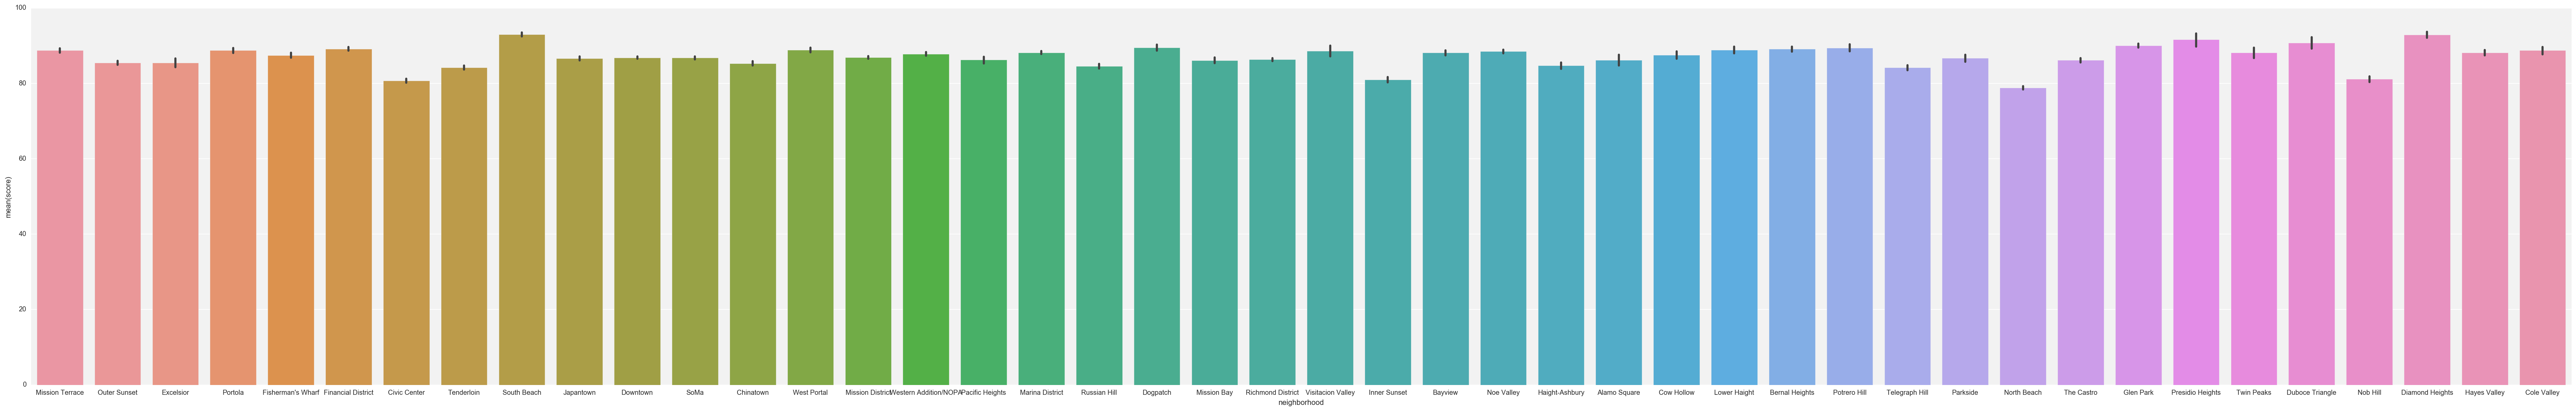

In [75]:
#I'd like to sort this 
sns.set(rc={"figure.figsize": (60, 10)})
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.barplot(x='neighborhood', y='score', data=for_plot)

In [76]:
#I'd like a plot of date vs score... perhaps month
plt.plot(interesting_vars.date, interesting_vars.score)

OverflowError: In draw_path: Exceeded cell block limit

### this is the whole dataset minus the obviously irrelevant columns...

In [77]:
#not useful so I'll drop this column
violations_parsed.type.value_counts()

routine     32453
followUp        2
Name: type, dtype: int64

In [78]:
violations_parsed.business_count.value_counts()

100.0    2448
112.0    2441
232.0    2309
367.0    2176
379.0    1706
186.0    1428
97.0     1327
170.0    1281
42.0     1071
214.0    1033
44.0      992
58.0      926
65.0      884
57.0      879
38.0      861
128.0     845
4.0       840
143.0     823
50.0      750
21.0      699
25.0      628
34.0      621
72.0      573
84.0      553
22.0      521
98.0      507
39.0      493
123.0     484
47.0      329
29.0      312
26.0      269
18.0      258
36.0      241
68.0      239
30.0      228
6.0       158
14.0      110
40.0       77
2.0        75
3.0        60
Name: business_count, dtype: int64

In [79]:
yelp = violations_parsed.drop(['business_id', 'date', 'type', 'name', 'address', 'city', 'state',\
                               'postal_code', 'latitude','longitude', 'phone_number', 'polygon', \
                               'score_code', 'description'], axis=1)


In [80]:
yelp.isnull().values.any()

False

In [81]:
yelp.head()

,score,violation_count,days_since_first_violation,neighborhood,population,business_count,200,200 feet,adulterated,adulterated food,...,washed fruits,wastewater,wastewater contamination,wastewater disposal,water,water running,wiping,wiping cloths,worker,worker safety
0,92.0,1.0,0.0,Downtown,"13,000",112.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,92.0,1.0,0.0,Downtown,"13,000",112.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92.0,1.0,0.0,Downtown,"13,000",112.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,94.0,2.0,196.0,Downtown,"13,000",112.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,94.0,2.0,196.0,Downtown,"13,000",112.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [82]:
# target = 'score'
formula = 'score ~ date + violation_count + days_since_first_violation + C(neighborhood) + population + business_count -1'

In [83]:
interesting_vars.columns

Index([u'score', u'date', u'violation_count', u'days_since_first_violation',
       u'neighborhood', u'population', u'business_count'],
      dtype='object')

In [84]:
interesting_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32455 entries, 0 to 32454
Data columns (total 7 columns):
score                         32455 non-null float64
date                          32455 non-null datetime64[ns]
violation_count               32455 non-null float64
days_since_first_violation    32455 non-null float64
neighborhood                  32455 non-null object
population                    1814 non-null float64
business_count                32455 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.7+ MB


In [89]:
y, X = patsy.dmatrices(formula, data=interesting_vars, return_type='dataframe')

In [107]:
X[['population','business_count']].drop_duplicates()

,population,business_count
8005,460.0,42.0
23202,828.0,26.0
29712,4000.0,4.0
32276,1000.0,2.0


In [109]:
X.business_count.unique()

array([ 42.,  26.,   4.,   2.])

In [90]:
# X = interesting_vars[['date', 'violation_count', 'days_since_first_violation', 'population', 'business_count']]

In [91]:
scaler = StandardScaler()

Xn = scaler.fit_transform(X)

In [92]:
X_train, X_test, y_train, y_test =  train_test_split(Xn, y, test_size=0.3)

print y_train.shape, X_train.shape
print y_test.shape, X_test.shape

(1269, 1) (1269, 826)
(545, 1) (545, 826)


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?